<a href="https://colab.research.google.com/github/kennyerss/csci451-project/blob/main/code/CS451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#need to import Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/Shareddrives/"

# choose where you want your project files to be saved
project_folder = "CheXpert-v1.0-small/"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place

create_and_set_working_directory(project_folder)

## Image Visualization

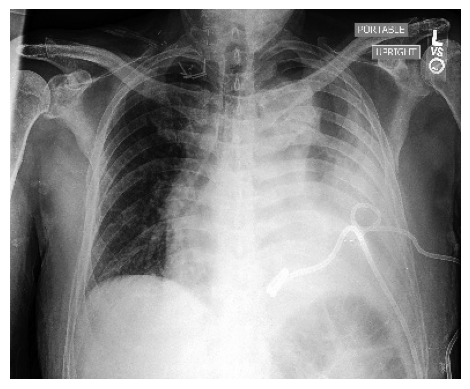

In [ ]:
#This just will show the images

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient00142/study3/view1_frontal.jpg')
#img = cv2.imread('/content/drive/MyDrive/chexpert_small/train/patient00974/study1/view1_frontal.jpg')
plt.imshow(img)
plt.axis("off")
plt.show()

## File reading tests

In [ ]:
from os import walk
for (dirpath, dirnames, filenames) in walk("content/drive/Shareddrives/CheXpert-v1.0-small/train/"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
#     print("File name: ", filenames)

## Data Analysis

We have a few different dataframes to work on. The first is what we define as df_race, which gives the patients race and ethnicity based on their ID. Here we define a sorted version so the patients will be in order by their ID.

In [ ]:
# import our race data set and load as a dataframe

import pandas as pd

df_race = pd.read_excel('/content/drive/Shareddrives/CheXpert-v1.0-small/chexpert_race.xlsx')
df_race_sorted = df_race.sort_values(by=['PATIENT'],ignore_index=True)
df_race_sorted = df_race_sorted.dropna()
df_race_sorted

,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY
0,patient00001,Female,68,Other,Non-Hispanic/Non-Latino
1,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino
2,patient00003,Male,41,"White, non-Hispanic",Non-Hispanic/Non-Latino
3,patient00004,Female,20,Black or African American,Non-Hispanic/Non-Latino
4,patient00005,Male,33,White,Non-Hispanic/Non-Latino
...,...,...,...,...,...
65396,patient65731,Female,64,White,Non-Hispanic/Non-Latino
65397,patient65732,Female,0,Asian,Non-Hispanic/Non-Latino
65398,patient65735,Female,1,White,Non-Hispanic/Non-Latino
65399,patient65739,Female,44,Unknown,Non-Hispanic/Non-Latino


['Other' 'White, non-Hispanic' 'Black or African American' 'White'
 'Native Hawaiian or Other Pacific Islander' 'Asian' 'Asian, non-Hispanic'
 'Unknown' 'Native American, non-Hispanic' 'Race and Ethnicity Unknown'
 'White, Hispanic' 'Other, Hispanic' 'Black, non-Hispanic'
 'American Indian or Alaska Native' 'Patient Refused'
 'Other, non-Hispanic' 'Pacific Islander, Hispanic' 'Black, Hispanic'
 'Pacific Islander, non-Hispanic' 'White or Caucasian' 'Asian, Hispanic'
 'Native American, Hispanic' 'Asian - Historical Conv']
White: 36768
 Asian: 7061
 Black: 3147
 Native American: 181
 Pacific Islander: 881
 Other/Unknown: 16817


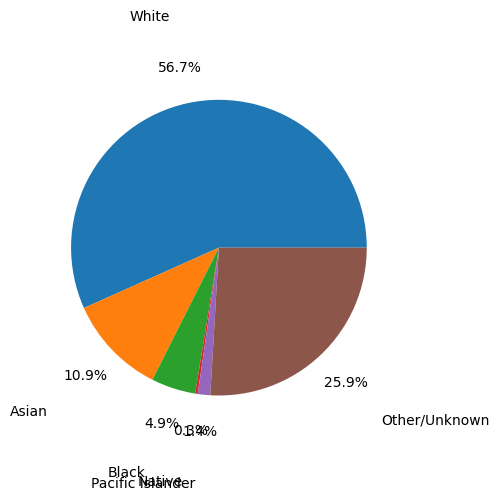

In [ ]:
import matplotlib.pyplot as plt

# print the unique labels for race - we need to make some determinations here
print(df_race_sorted['PRIMARY_RACE'].unique())
white_no = (df_race_sorted['PRIMARY_RACE'].str.contains('White')).sum()
black_no = (df_race_sorted['PRIMARY_RACE'].str.contains('Black')).sum()
asian_no = (df_race_sorted['PRIMARY_RACE'].str.contains('Asian')).sum()
native_no = (df_race_sorted['PRIMARY_RACE'].str.contains('Native American')).sum()
native_no += (df_race_sorted['PRIMARY_RACE'].str.contains('Indian')).sum()
islander_no = (df_race_sorted['PRIMARY_RACE'].str.contains('Pacific')).sum()
rest_no = len(df_race_sorted) - white_no - black_no - asian_no - native_no - islander_no

print('White: ' + str(white_no) + '\n Asian: ' + str(asian_no) + '\n Black: ' + str(black_no) + '\n Native American: ' + str(native_no) + '\n Pacific Islander: '
+ str(islander_no) + '\n Other/Unknown: ' + str(rest_no))

labels = ['White', 'Asian', 'Black', 'Native', 'Pacific Islander', 'Other/Unknown']
sizes = [white_no, asian_no, black_no, native_no, islander_no, rest_no]

plt.pie(sizes, labels = labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=1.6)
plt.show()


In [ ]:
dk = df_race.groupby(['GENDER', 'PRIMARY_RACE']).mean()

<ipython-input-7-65386d05034c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dk = df_race.groupby(['GENDER', 'PRIMARY_RACE']).mean()


Looking at the ethnicities, we can see the main groups are Hispanic/Latino and Non-Hispanic/Non-Latino (along with Not Hispanic which is a bit confusing). The Unknown or Patient Refused Categories also exist of course.

In [ ]:
#print the unique labels for ethnicity
print(df_race['ETHNICITY'].unique())

['Non-Hispanic/Non-Latino' 'Hispanic/Latino' 'Unknown' nan
 'Patient Refused' 'Hispanic' 'Not Hispanic']


In [ ]:
#subset data by the "Other" listed for Race
df_race[df_race['PRIMARY_RACE'] == 'Other']

,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY
1,patient48289,Female,39,Other,Hispanic/Latino
13,patient51575,Male,68,Other,Hispanic/Latino
32,patient28670,Male,63,Other,Hispanic/Latino
53,patient65275,Female,59,Other,Non-Hispanic/Non-Latino
61,patient54887,Male,74,Other,Hispanic/Latino
...,...,...,...,...,...
65386,patient33297,Female,40,Other,Hispanic/Latino
65390,patient15562,Female,50,Other,Hispanic/Latino
65395,patient32620,Female,21,Other,Hispanic/Latino
65396,patient65702,Male,1,Other,Hispanic/Latino


Our next important dataframe is df_patients, which holds a csv of image links with the sex, age, and other features of the patients related to their hospitalization. Notice that the patient ID is included inside the text for the links. Also, notice that one patient can have multiple images from different visiting times. Images are in two categories frontal and lateral (front of body vs. side of body).

In [ ]:
df_patients = pd.read_csv('/content/drive/Shareddrives/CheXpert-v1.0-small/train.csv')
df_patients

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


We do some basic data cleaning by adding a column for the patient ID (extracted from the image links). We also turn race into numeric categories: 0 - White, 1 - Black, 2 - Asian, 3 - Other. Notice that the first three groups, any race identification containing White, for example, whether 'White, Hispanic' or 'White, Caucasian' will be classified as white.

In [ ]:
#again, df_patients['PATIENT'] holds links for the file directory, here I split so instead I can have the patient ID
df_patients['PATIENT'] = [df_patients['Path'][i].split("/")[2] for i in range(df_patients.shape[0])]

#I then merge the patient race with df_race_sorted, which will give me the patient ID - race
df_patients_race = pd.merge(df_patients,df_race_sorted,on='PATIENT')
"""
#check
for index, row in df_patients_race[206949:].iterrows():
  race_sorted_index = df_race_sorted.index[df_race_sorted["PATIENT"] == row["PATIENT"]].tolist()
  if (len(race_sorted_index) != 1):
    print("error!")
    break
  i = race_sorted_index[0]
  if not (row['PATIENT'] in row['Path']):
    print(row,"patient error!")
    break
  if not (row['ETHNICITY'] == df_race_sorted["ETHNICITY"][i]):
    print(row,"ethnicity error!",row['ETHNICITY'],df_race_sorted["ETHNICITY"][i])
    break
  if not (row['PRIMARY_RACE'] == df_race_sorted["PRIMARY_RACE"][i]):
    print(row,"race error!")
    break
  if not (row['Sex'] == df_race_sorted["GENDER"][i]):
    print(row,"sex error!")
    break
"""

#there is a gender error for patient 51668, index 202352
# gender error for patient 54170, index 206312
# gender error for patient 54565, index 206948

def race_to_num(string):
  if 'White' in string:
    return 0
  elif 'Black' in string:
    return 1
  elif 'Asian' in string:
    return 2
  else:
    return 3

df_patients_race["RACE_NUM"] = [race_to_num(df_patients_race["PRIMARY_RACE"][i]) for i in range(len(df_patients_race))]

df_patients_race

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pleural Effusion,Pleural Other,Fracture,Support Devices,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY,RACE_NUM
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,patient00001,Female,68,Other,Non-Hispanic/Non-Latino,3
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,-1.0,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,patient00003,Male,41,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220992,CheXpert-v1.0-small/train/patient64535/study1/...,Male,60,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,patient64535,Male,60,Black or African American,Non-Hispanic/Non-Latino,1
220993,CheXpert-v1.0-small/train/patient64536/study2/...,Female,61,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,patient64536,Female,61,Other,Hispanic/Latino,3
220994,CheXpert-v1.0-small/train/patient64536/study1/...,Female,61,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,patient64536,Female,61,Other,Hispanic/Latino,3
220995,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,...,1.0,NaN,NaN,NaN,patient64537,Male,59,Black or African American,Non-Hispanic/Non-Latino,1


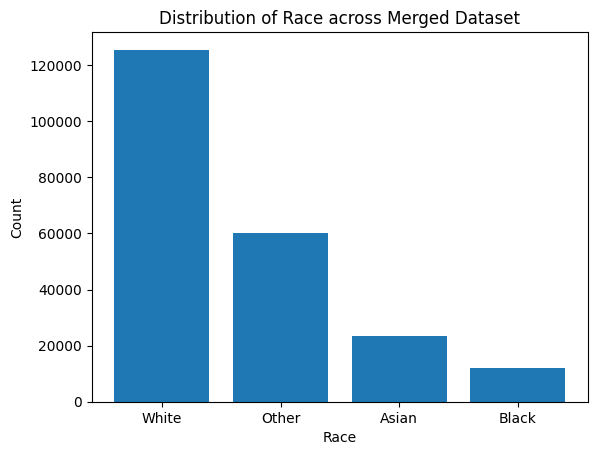

In [ ]:
# Visualization of the presence of each 'merged' race
import numpy as np 
import matplotlib.pyplot as plt

bars = ('White', 'Other', 'Asian', 'Black')
x_pos = np.arange(len(bars))
height = df_patients_race['RACE_NUM'].value_counts()
plt.bar(bars, height)

# Add title and axis names
plt.title('Distribution of Race across Merged Dataset')
plt.xlabel('Race')
plt.ylabel('Count')
 
# Create names on the x axis
plt.xticks(x_pos, bars)

plt.show()

We wanted to recreate the results of the paper, and they focused only on White, Black, and Asian groups. We will therefore subset our data only by these populations.

In [ ]:
df_patients_bwa = df_patients_race[df_patients_race['PRIMARY_RACE'].str.contains('White|Black|Asian')==True]
df_patients_bwa

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pleural Effusion,Pleural Other,Fracture,Support Devices,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY,RACE_NUM
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,-1.0,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,patient00003,Male,41,"White, non-Hispanic",Non-Hispanic/Non-Latino,0
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,patient00004,Female,20,Black or African American,Non-Hispanic/Non-Latino,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220990,CheXpert-v1.0-small/train/patient64533/study2/...,Male,75,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,patient64533,Male,75,White,Non-Hispanic/Non-Latino,0
220991,CheXpert-v1.0-small/train/patient64534/study1/...,Male,63,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,0.0,NaN,NaN,NaN,patient64534,Male,63,White,Non-Hispanic/Non-Latino,0
220992,CheXpert-v1.0-small/train/patient64535/study1/...,Male,60,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,patient64535,Male,60,Black or African American,Non-Hispanic/Non-Latino,1
220995,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,...,1.0,NaN,NaN,NaN,patient64537,Male,59,Black or African American,Non-Hispanic/Non-Latino,1


So df_patients_bwa is df_patients_race but with the "Other" category dropped - just Black, White, and Asian. The csv train_bwa is the first 72000 images of df_patients_bwa. The csv valid_bwa is the 72000-90000 images.

Then I have created the csv train_bwa_equal, which took the first 6000 images from each group of train_bwa and shuffled them. I chose 6000, because there are 6146 Black people in train_bwa (which is the smallest group). The csv valid_bwa_equal takes 1000 images from each group of valid_bwa and shuffled them. I chose 1000 because there are 1281 images belonging to Black patients in valid_bwa.

In [ ]:
print(df_patients_bwa['PRIMARY_RACE'].unique())
print(df_patients_bwa['RACE_NUM'].unique())

['White, non-Hispanic' 'Black or African American' 'White' 'Asian'
 'Asian, non-Hispanic' 'White, Hispanic' 'Black, non-Hispanic'
 'Black, Hispanic' 'White or Caucasian' 'Asian, Hispanic'
 'Asian - Historical Conv']
[0 1 2]


In [ ]:
df_patients_race.groupby("RACE_NUM").size()

RACE_NUM
0    125483
1     11961
2     23272
3     60281
dtype: int64

In [ ]:
df_patients_bwa[:72000].groupby("RACE_NUM").size()

RACE_NUM
0    55314
1     6146
2    10540
dtype: int64

In [ ]:
df_patients_bwa[72000:90000].groupby("RACE_NUM").size()

RACE_NUM
0    14203
1     1281
2     2516
dtype: int64

In [ ]:
df_train_bwa = pd.read_csv('/content/drive/Shareddrives/CheXpert-v1.0-small/train_bwa.csv')
df_test_bwa = pd.read_csv('/content/drive/Shareddrives/CheXpert-v1.0-small/test_bwa.csv')

df_train_bwa_equal = pd.read_csv('/content/drive/Shareddrives/CheXpert-v1.0-small/train_bwa_equal.csv')
df_test_bwa_equal = pd.read_csv('/content/drive/Shareddrives/CheXpert-v1.0-small/test_bwa_equal.csv')

In [ ]:
df_train_bwa_equal[:6000].RACE_NUM.value_counts()

1    2062
0    1973
2    1965
Name: RACE_NUM, dtype: int64

TODO: Should do analysis on number of patients in each subset, etc.

This last bit of code was to check that all the images linked to our loaded data actually exist.

In [ ]:
i = 124000

import os

#ran already, found anomaly only with patient 11019
"""
for index, row in df_patients_race[124000:125000].iterrows():
    row_path_list = row['Path'].split("/")
    row_path = os.path.join("/content/drive/Shareddrives/CheXpert-v1.0-small/train",row_path_list[2],row_path_list[3],row_path_list[4])
    
    dir_path = os.path.join("/content/drive/Shareddrives/CheXpert-v1.0-small/train",row_path_list[2],row_path_list[3])
    os.chdir(dir_path)

    if (i % 1000 == 0):
      print(i, row_path_list[2])

    if not os.path.isfile(row_path_list[4]):
      print(row_path)

    #print(row_path)

    #print(i)
    
    
    #if not os.path.isfile(row_path):
    #  print(row_path)
    i += 1
"""

In [ ]:
df_patients_bwa.groupby("RACE_NUM").size()

RACE_NUM
0    125483
1     11961
2     23272
dtype: int64

In [ ]:
white_patients_size = (df_race_sorted['PRIMARY_RACE'].str.contains('White')==True).sum()
black_patients_size = (df_race_sorted['PRIMARY_RACE'].str.contains('Black')==True).sum()
asian_patients_size = (df_race_sorted['PRIMARY_RACE'].str.contains('Asian')==True).sum()

print("Average photos: ",125483/white_patients_size)
print("Average photos: ",11961/black_patients_size)
print("Average photos: ",23272/asian_patients_size)

Average photos:  3.4128318102698
Average photos:  3.8007626310772165
Average photos:  3.2958504461124485


## Data Preparation and Loading

In [ ]:
import sys
import os
from pathlib import Path
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import optim

import torchvision.transforms as transforms
import torchvision

from fastprogress import master_bar, progress_bar

from PIL import Image

IMAGENET_MEAN = [0.485, 0.456, 0.406]         # Mean of ImageNet dataset (used for normalization)
IMAGENET_STD = [0.229, 0.224, 0.225]          # Std of ImageNet dataset (used for normalization)


#I used a lot of code from https://www.kaggle.com/code/hmchuong/chexpert-pytorch-densenet121?scriptVersionId=18314696&cellId=15

class ChestXrayDataset(Dataset):

  def __init__(self,folder_dir,dataframe,image_size,normalization):
    #a lot of this function is 
    # folder_dir is the directory path to the data
    # dataframe holds patient info and labels
    # it takes in our image labels

    self.image_paths=[]
    self.image_labels=[]

    #This transforms our image, I think we would also need normalization
    # #original paper has random zoom, we did not implement that
    image_transformation = [
        #transforms.Grayscale(num_output_channels=1), #ONLY USE FOR PYTORCH XRAY
        transforms.Resize((image_size,image_size)),
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15)]

    #this normalizes using some constants from imagenet
    if normalization:
    #  #ONLY COMMENT OUT FOR PYTORCH XRAY
      image_transformation.append(transforms.Normalize(IMAGENET_MEAN,IMAGENET_STD))
    #  #image_transformation.append(transforms.Normalize([0.485],[0.229]))

    self.image_transformation = transforms.Compose(image_transformation)

    #this will index through all the patients from 000001, so forth, adding images from study1
    for index, row in dataframe.iterrows():
      
      #image_path = os.path.join(folder_dir,Path(row['PATIENT']),Path('study1'),Path('view1_frontal.jpg'))

      #here I use lateral and frontal images
      #OLD CODE
      #row_path_list = row['Path'].split("/")
      #image_path = os.path.join(folder_dir,row_path_list[2],row_path_list[3],row_path_list[4])
      
      image_path = os.path.join(folder_dir,row['Path'])

      #if (os.path.isfile(image_path)):
      self.image_paths.append(image_path)
      #else:
      #  continue
      #in this case I've hard-coded the image_labels to be if the patient is Black or not
      #NOTICE that I'm append a list to a list here
      
      image_label = []

      image_label.append(int(row["RACE_NUM"]))
      
      """
      if ( row["PRIMARY_RACE"] ==  'White' or row["PRIMARY_RACE"] == 'White, non-Hispanic' or row["PRIMARY_RACE"] == 'White or Caucasian'):
        image_label.append(1)
      #else:
      #  image_label.append(0)
      elif ( row["PRIMARY_RACE"] ==  'Black or African American' or row["PRIMARY_RACE"] == 'Black, non-Hispanic'):
        image_label.append(2)
      #else:
      #  image_label.append(0)

      elif ( row["PRIMARY_RACE"] ==  'Asian' or row["PRIMARY_RACE"] == 'Asian, non-Hispanic' or row["PRIMARY_RACE"] == 'Asian - Historical Conv' or row['PRIMARY_RACE'] == 'Asian - Historical Conv'):
        image_label.append(3)
      else:
        image_label.append(0)
      """

      #DELETE THIS IF NOT USING TORCH XRAY
      #for i in range(17):
      #  image_label.append(5)
      
      self.image_labels.append(image_label)

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self,index):
    #This is also just necessary for other parts

    # Read image
    image_path = self.image_paths[index]
    #ONLY COMMENT OUT FOR PYTORCH XRAY
    image_data = Image.open(image_path).convert("RGB")
    image_data = self.image_transformation(image_data)
      
    return image_data, torch.FloatTensor(self.image_labels[index])



In [ ]:
IMAGE_SIZE = 224                              # Image size (224x224)
# BATCH_SIZE = 20                        
BATCH_SIZE = 1728 #ONLY FOR PYTORCH XRAY VISION
LEARNING_RATE = 0.001
LEARNING_RATE_SCHEDULE_FACTOR = 0.1           # Parameter used for reducing learning rate
LEARNING_RATE_SCHEDULE_PATIENCE = 5           # Parameter used for reducing learning rate
MAX_EPOCHS = 2                              # Maximum number of training epochs

Define the dataset object here

In [ ]:
#train_dataset = ChestXrayDataset("/content/drive/Shareddrives/CheXpert-v1.0-small/train", df_train_race_mod, race_is_white, IMAGE_SIZE, True)

#train the dataset with the first 2000 images, this includes frontal and lateral images
train_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_train_bwa_equal[:6000], IMAGE_SIZE, True)

In [ ]:
#DELETE LATER, just to check data is loaded properly

import numpy as np
print(train_dataset.image_labels[:10])
print(train_dataset.image_paths[:10])
print("dataset length: ", len(train_dataset))

[[2], [2], [1], [0], [1], [2], [0], [0], [2], [0]]
['/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient10489/study1/view2_lateral.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient04407/study1/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient09579/study12/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient01849/study1/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient02480/study1/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient07322/study1/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient01165/study10/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient02523/study1/view2_lateral.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient14912/study1/view1_frontal.jpg', '/content/drive/Shareddrives/CheXpert-v1.0-small/train/patient02774/study3/view1_frontal.jp

Create the loader for the dataset here - basically it is nice to have this so we can load the data in batches when we need instead of loading the entire dataset onto RAM, which is costly and slow.

In [ ]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, num_workers=2, shuffle=True, pin_memory=True)

In [ ]:
#I believe that this functions as a test - if this block returns an error, there is a problem with dataloading
for data, label in train_dataloader:
    print(data.size())
    print(label.size())
    break

torch.Size([20, 3, 224, 224])
torch.Size([20, 1])


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')

Defining some functions now to train our model:

In [ ]:
import torch.optim as optim

def train(model, trainloader, optimizer, k_epochs = 1, print_every = 2000, loss_fn = nn.CrossEntropyLoss()):

    begin = time.time()

    # loss function is cross-entropy (multiclass logistic)

    #if weights != None:
    #  weights.to(device)

    #loss_fn = nn.CrossEntropyLoss(weight = weights) 

    # optimizer is Adam, which does fancier stuff with the gradients
    # optimizer = optim.Adam(model.parameters(), lr=0.001)

    #if using pretrained model
    model.train()

    for epoch in range(k_epochs): 

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):

            # extract a batch of training data from the data loader
            X, y = data
            X = X.to(device)

            #print(y)
            
            #need to flatten y - this holds labels for each image in the batch, but as a list of a list
            y = torch.flatten(y)
            y = y.to(torch.long)
            
            #print(y)

            y = y.to(device)

            # zero out gradients: we're going to recompute them in a moment
            optimizer.zero_grad()

            # compute the loss (forward pass)
            y_hat = model(X)

            #print(y_hat)

            loss = loss_fn(y_hat, y)

            # compute the gradient (backward pass)
            loss.backward()

            # Adam uses the gradient to update the parameters
            optimizer.step()

            # print statistics
            running_loss += loss.item()

            # print the epoch, number of batches processed, and running loss 
            # in regular intervals
            if i % print_every == print_every - 1:    
                print(f'[epoch: {epoch + 1}, batches: {i + 1:5d}], loss: {running_loss / print_every:.3f}')
                running_loss = 0.0

    end = time.time()
    print(f'Finished training in {round(end - begin)}s')

In [ ]:
def test(model, testloader):
    correct = 0
    total = 0
    # torch.no_grad creates an environment in which we do NOT store the 
    # computational graph. We don't need to do this because we don't care about 
    # gradients unless we're training

    y_true = []
    y_pred = []

    #if model is pretrained
    model.eval()

    with torch.no_grad():
        for data, label in testloader:
            #X, y = data
            X = data
            y = label
            X = X.to(device)

            y = torch.flatten(label)
            y = y.to(torch.long)
            y = y.to(device)

            print(y)
            
            # run all the images through the model
            y_hat = model(X)

            #print(y_hat)

            # the class with the largest model output is the prediction
            _, predicted = torch.max(y_hat.data, 1)

            print("predicted: ",predicted)

            y_pred.extend(predicted.data.cpu().numpy()) 
        
            y_true.extend(y.data.cpu().numpy())

            # compute the accuracy
            total += y.size(0)
            correct += (predicted == y).sum().item()

            #print(total,correct)

    print(f'Test accuracy: {100 * correct // total} %')

    return y_pred, y_true

In [ ]:
!pip install torchxrayvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 35.4 MB/s eta 0:00:00


In [ ]:
from torchvision import models
import torchxrayvision as xrv
import skimage, torch, torchvision

# instead train only the parameters of the final layer
# can be around 50% faster

#"""
#pretrained resnet 18 model with weights from IMAGENET
model = models.resnet18(weights='IMAGENET1K_V1')
model = model.to(device)

# no gradients for any of the model parameters, so no updates

for param in model.parameters():
  param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
#out_ftrs = 2 #for binary classification
out_ftrs = 4
model.fc = nn.Linear(num_ftrs, out_ftrs)

model = model.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
#optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
optimizer = optim.Adam(model.fc.parameters(), lr=0.0005)
#"""

'''
#from pytorch xrayvision use a pretrained model
model = xrv.models.DenseNet(weights="densenet121-res224-nih") # NIH chest X-ray8
model = model.to(device)

# no gradients for any of the model parameters, so no updates

for param in model.parameters():
  param.requires_grad = False

print(model.classifier.in_features,model.classifier.out_features)

# Parameters of newly constructed modules have requires_grad=True by default
#num_ftrs = model.classifier.in_features
#out_ftrs = 2 #for binary classification
#out_ftrs = 4
#model.classifier = nn.Linear(num_ftrs, out_ftrs)

print(model.classifier.in_features,model.classifier.out_features)

model = model.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
'''

'\n#from pytorch xrayvision use a pretrained model\nmodel = xrv.models.DenseNet(weights="densenet121-res224-nih") # NIH chest X-ray8\nmodel = model.to(device)\n\n# no gradients for any of the model parameters, so no updates\n\nfor param in model.parameters():\n  param.requires_grad = False\n\nprint(model.classifier.in_features,model.classifier.out_features)\n\n# Parameters of newly constructed modules have requires_grad=True by default\n#num_ftrs = model.classifier.in_features\n#out_ftrs = 2 #for binary classification\n#out_ftrs = 4\n#model.classifier = nn.Linear(num_ftrs, out_ftrs)\n\nprint(model.classifier.in_features,model.classifier.out_features)\n\nmodel = model.to(device)\n\n# Observe that only parameters of final layer are being optimized as\n# opposed to before.\noptimizer = optim.Adam(model.classifier.parameters(), lr=0.001)\n'

In [ ]:
from torchsummary import summary

summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
train_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_train_bwa_equal[:6000], IMAGE_SIZE, True)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=50, num_workers=2, shuffle=True, pin_memory=True)
train(model, train_dataloader, optimizer, k_epochs=40, print_every = 50)

[epoch: 1, batches:    50], loss: 1.145
[epoch: 1, batches:   100], loss: 1.099
[epoch: 2, batches:    50], loss: 1.063
[epoch: 2, batches:   100], loss: 1.062
[epoch: 3, batches:    50], loss: 1.037
[epoch: 3, batches:   100], loss: 1.021
[epoch: 4, batches:    50], loss: 1.017
[epoch: 4, batches:   100], loss: 1.014
[epoch: 5, batches:    50], loss: 1.000
[epoch: 5, batches:   100], loss: 0.997
[epoch: 6, batches:    50], loss: 1.003
[epoch: 6, batches:   100], loss: 0.990
[epoch: 7, batches:    50], loss: 1.001
[epoch: 7, batches:   100], loss: 0.984
[epoch: 8, batches:    50], loss: 0.986
[epoch: 8, batches:   100], loss: 0.975
[epoch: 9, batches:    50], loss: 0.972
[epoch: 9, batches:   100], loss: 0.983
[epoch: 10, batches:    50], loss: 0.981
[epoch: 10, batches:   100], loss: 0.978
[epoch: 11, batches:    50], loss: 0.977
[epoch: 11, batches:   100], loss: 0.978
[epoch: 12, batches:    50], loss: 0.981
[epoch: 12, batches:   100], loss: 0.987
[epoch: 13, batches:    50], loss:

In [ ]:
test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal[:3000], IMAGE_SIZE, True)

test_dataloader = DataLoader(dataset=test_dataset, batch_size=50, shuffle=False, num_workers=2, pin_memory=True)

#train(model, train_dataloader, optimizer, k_epochs = 5, print_every = 20)
y_pred_enet, y_true_enet = test(model,test_dataloader)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cf_matrix = confusion_matrix(y_true_enet, y_pred_enet)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

tensor([0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2,
        2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0,
        2, 0], device='cuda:0')
predicted:  tensor([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1,
        2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0,
        2, 0], device='cuda:0')
tensor([2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2,
        0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2,
        2, 1], device='cuda:0')
predicted:  tensor([2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1,
        0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1,
        2, 1], device='cuda:0')
tensor([1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1,
        2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0,
        1, 2], device='cuda:0')
predicted:  tens

NameError: ignored

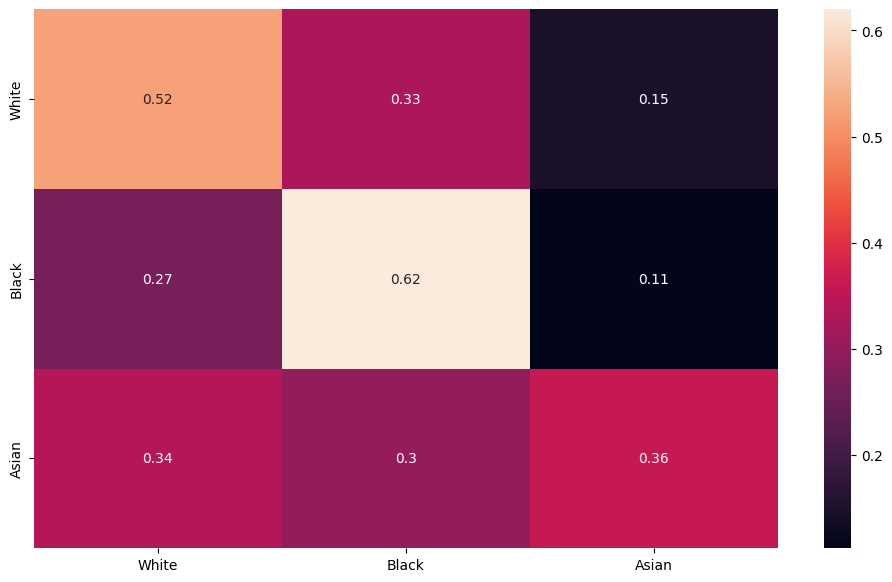

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

Efficient Net B4 Implementation

In [ ]:
!pip install --upgrade efficientnet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16444 sha256=43c064c0d28843d60f4aed3444759f8863c9a998722226330d16be929a6fb05e
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


In [ ]:
import time

from efficientnet_pytorch import EfficientNet
#UNCOMMENT THIS OF COURSE
#model = EfficientNet.from_pretrained('efficientnet-b0',num_classes=3)
#model = model.to(device)

train_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_train_bwa_equal[:6000], IMAGE_SIZE, True)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=50, num_workers=2, shuffle=True, pin_memory=True)
#I believe that this functions as a test - if this block returns an error, there is a problem with dataloading
for data, label in train_dataloader:
    print(data.size())
    print(label.size())
    break

test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_test_bwa_equal[:1500], IMAGE_SIZE, True)
#test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_patients_bwa[87000:88500], IMAGE_SIZE, True)
#test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_patients_bwa_equal[10000:10400], IMAGE_SIZE, True)

test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

optimizer = optim.Adam(model.parameters(), lr=0.001)

#ADDING WEIGHTS HERE SO I CAN reduce bias

#this is the inverse of the proportion of images by race in df_patients_bwa
weights = torch.tensor([(125483+11961+23272)/125483,(125483+11961+23272)/11961,(125483+11961+23272)/23272],dtype=torch.float)

#weights = None
#weights = [1,20,10]
weights = weights.to(device)

loss_fn = nn.CrossEntropyLoss() 
#print(loss_fn(torch.tensor([1.,2.,3.]),torch.tensor([4.,5.,6.])))

#print(device)
print("weights device: ", weights.device)

train(model, train_dataloader, optimizer, k_epochs = 5, print_every = 40, loss_fn = loss_fn)
y_pred_enet, y_true_enet = test(model,test_dataloader)

torch.Size([50, 3, 224, 224])
torch.Size([50, 1])
weights device:  cuda:0
[epoch: 1, batches:    40], loss: 0.457
[epoch: 1, batches:    80], loss: 0.496
[epoch: 1, batches:   120], loss: 0.436
[epoch: 2, batches:    40], loss: 0.343
[epoch: 2, batches:    80], loss: 0.405
[epoch: 2, batches:   120], loss: 0.394
[epoch: 3, batches:    40], loss: 0.327
[epoch: 3, batches:    80], loss: 0.369
[epoch: 3, batches:   120], loss: 0.356
[epoch: 4, batches:    40], loss: 0.264
[epoch: 4, batches:    80], loss: 0.345
[epoch: 4, batches:   120], loss: 0.320
[epoch: 5, batches:    40], loss: 0.237
[epoch: 5, batches:    80], loss: 0.281
[epoch: 5, batches:   120], loss: 0.310
Finished training in 291s
tensor([0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2,
        2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0,
        2, 0], device='cuda:0')
predicted:  tensor([0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 2,
        2, 2, 2,

[[367  52  80]
 [138 314  45]
 [111  49 344]]


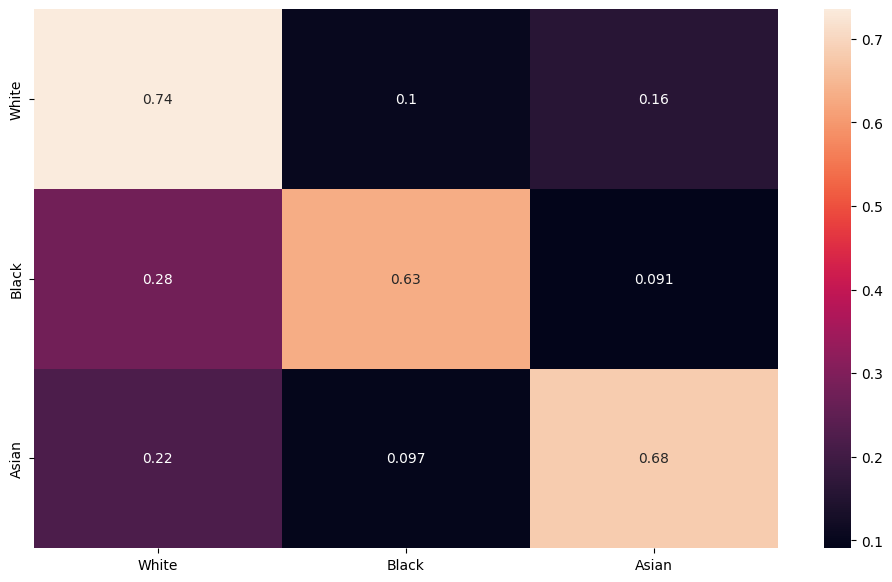

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_true_enet, y_pred_enet)

print(cf_matrix)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
test_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_patients_race[120000:120400], IMAGE_SIZE, True)

test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

#train(model, train_dataloader, optimizer, k_epochs = 5, print_every = 20)
y_pred_enet, y_true_enet = test(model,test_dataloader)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_true_enet, y_pred_enet)

classes = ['White','Black','Asian','Other']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_true_enet, y_pred_enet)

classes = ['White','Black','Asian']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

ValueError: ignored

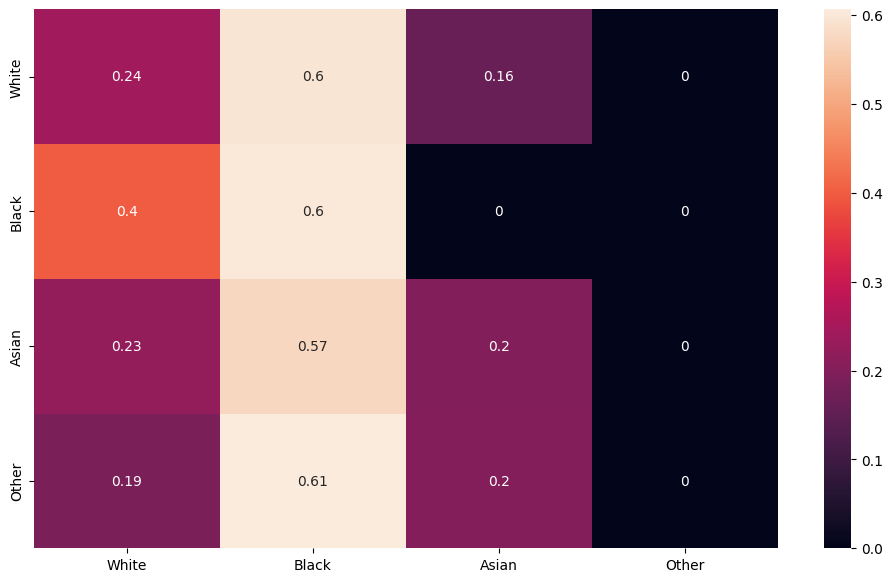

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_true_enet, y_pred_enet)

classes = ['White','Black','Asian', 'Other']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

Model Optimization

We will do hold-out optimization as our dataset is large enough that cross validation is not neccessary. Moreover, training times for the algorithm are expensive.

In [ ]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from sklearn.model_selection import KFold
import time
from torchvision import models
from efficientnet_pytorch import EfficientNet

def train_epoch(model, trainloader, optimizer, loss_fn, print_every = 2000):

  training_loss = 0.0

  num_batches = len(trainloader)

  model.train()

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):

      X, y = data
      X = X.to(device)

      y = torch.flatten(y)
      y = y.to(torch.long)
      y = y.to(device)

      optimizer.zero_grad()

      y_hat = model(X)
      loss = loss_fn(y_hat, y)

      loss.backward()

      optimizer.step()

      training_loss += loss.item()
      running_loss += loss.item()
      
      if (i % 20 == 19):
        print("Batch ",i,"/",num_batches, " done! Training loss: ",running_loss/20)
        running_loss = 0.0

  return training_loss/num_batches

def test_epoch(model, testloader, loss_fn):
  correct = 0
  total = 0
  running_loss = 0.0
  num_batches = len(testloader)

  model.eval()

  with torch.no_grad():
      for data, label in testloader:

          X = data
          y = label
          X = X.to(device)

          y = torch.flatten(label)
          y = y.to(torch.long)
          y = y.to(device)

          y_hat = model(X)

          _, predicted = torch.max(y_hat.data, 1)

          # compute the accuracy
          total += y.size(0)
          correct += (predicted == y).sum().item()
          loss = loss_fn(y_hat, y)
          running_loss += loss.item()

  return correct/total, running_loss/num_batches

def optimize(train_loader,val_loader,lr_params,max_epochs=100,batch_size=BATCH_SIZE,loss_fn = nn.CrossEntropyLoss(), use_scheduler = False, print_every = 20):
  """
  So far this only optimizes the learning rate, ideally it would optimize more
  https://medium.com/dataseries/k-fold-cross-validation-with-pytorch-and-sklearn-d094aa00105f
  a helpful example
  """

  begin = time.time()

  #train_data, val_data = random_split(train_dataset, [0.8*len(train_dataset), 0.2*len(train_dataset)])

  #train_loader = DataLoader(train_data, batch_size=batch_size)
  #val_loader = DataLoader(val_data, batch_size=batch_size)

  #stores the best loss, accuracy for each param value
  best_train_losses = []
  best_train_accs = []
  best_val_accs = []
  best_val_losses = []

  train_loss_history = []
  train_acc_history = []
  val_acc_history = []
  val_loss_history = []

  for lr_param in lr_params:

    print("Param value: ",lr_param)

    #holds best losses in each fold for particular param value
    #train_losses = []
    #valid_accs = []

    train_loss_history_param = []
    train_acc_history_param = []
    val_acc_history_param = []
    val_loss_history_param = []

    best_train_loss = 10000.0
    best_train_acc = 0.0
    best_val_loss = 10000.0
    best_val_acc = 0.0

    best_train_loss_epoch = 0
    best_train_acc_epoch = 0
    best_val_acc_epoch = 0
    best_val_loss_epoch = 0

    #NOT THE BEST WAY TO DO THIS
    #define the model each loop so it resets
    
    model = EfficientNet.from_pretrained('efficientnet-b0',num_classes=3)
    
    """
    for param in model.parameters():
      param.requires_grad = False
    num_ftrs = model._fc.in_features
    model._fc = nn.Linear(num_ftrs, 3)
    """
    #model = models.resnet18(weights='IMAGENET1K_V1')
    #for param in model.parameters():
    #  param.requires_grad = False
    #num_ftrs = model.fc.in_features
    #out_ftrs = 3
    #model.fc = nn.Linear(num_ftrs, out_ftrs)
    model = model.to(device)

    #I decided just to train the last linear layer since overfitting
    #optimizer = optim.Adam(model._fc.parameters(), lr=lr_param) #train last linear layer of efficientb4 which is called _fc, NOT fc
    optimizer = optim.Adam(model.parameters(), lr=lr_param)

    if use_scheduler:
      #scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
      scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=0.00001, verbose=True)

    for epoch in range(max_epochs):
    
      train_loss = train_epoch(model, train_loader, optimizer, loss_fn)
      train_acc, train_junk = test_epoch(model,train_loader,loss_fn)
      val_acc, val_loss = test_epoch(model, val_loader, loss_fn)

      if use_scheduler:
        scheduler.step(val_loss)

      train_loss_history_param.append(train_loss)
      train_acc_history_param.append(train_acc)
      val_acc_history_param.append(val_acc)
      val_loss_history_param.append(val_loss)

      if train_loss < best_train_loss:
        best_train_loss = train_loss
        best_train_acc_epoch = epoch
      if train_acc > best_train_acc:
        best_train_acc = train_acc
        best_train_acc_epoch = epoch

      if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_train_acc_epoch = epoch
      if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_val_acc_epoch = epoch

      if (epoch % print_every == 0):
        print("Epoch: ",epoch)
        print("Best train loss: ",best_train_loss)
        print("Best train accuracy: ",best_train_acc)
        print("Best validation accuracy: ",best_val_acc)
        print("Validation loss: ",val_loss)

    best_train_losses.append((best_train_loss_epoch,best_train_loss))
    best_train_accs.append((best_train_acc_epoch,best_train_acc))
    best_val_accs.append((best_val_acc_epoch,best_val_acc))
    best_val_losses.append((best_val_acc_epoch,best_val_acc))

    print("Best validation epoch: ",best_val_acc_epoch)
    print("Best training loss: ",(best_train_loss_epoch,best_train_loss))
    print("Best training accuracy: ",(best_train_acc_epoch,best_train_acc))
    print("Best validation accuracy: ",(best_val_acc_epoch,best_val_acc))

    train_loss_history.append(train_loss_history_param)
    train_acc_history.append(train_acc_history_param)
    val_acc_history.append(val_acc_history_param)
    val_loss_history.append(val_loss_history_param)

    print("\n")

  #outside parameterization loop
  #best losses amongst fold

  end = time.time()
  print(f'Finished optimizing in {round(end - begin)}s')

  print("Best param: ", lr_params)
  print("Best train loss: ",best_train_losses)
  print("Best train accuracy: ",best_train_accs)
  print("Best valid accuracy: ",best_val_accs)

  #NEED TO ADD val_loss_history
  return model, train_loss_history, train_acc_history, val_acc_history

  


"""  
def optimize(train_dataset,lr_params,max_epochs=100,batch_size=BATCH_SIZE):
  
  #So far this only optimizes the learning rate, ideally it would optimize more
  #https://medium.com/dataseries/k-fold-cross-validation-with-pytorch-and-sklearn-d094aa00105f
  #a helpful example
  

  begin = time.time()

  loss_fn = nn.CrossEntropyLoss()

  k_folds = 5

  splits=KFold(n_splits=k_folds,shuffle=True,random_state=42)

  #best_param = lr_params[0]
  #best_train_loss = 10.0
  #best_valid_loss = 10.0
  
  best_train_losses = []
  best_valid_losses = []

  for lr_param in lr_params:

    print("Param value: ",lr_param)

    #holds best losses in each fold for particular param value
    train_losses = []
    valid_losses = []

    for fold, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(train_dataset)))):

      print("Fold: ",fold)

      train_sampler_epoch = SubsetRandomSampler(train_idx)
      val_sampler_epoch = SubsetRandomSampler(val_idx)
      train_loader_epoch = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler_epoch)
      val_loader_epoch = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler_epoch)
      
      #pretrained resnet 18 model with weights from IMAGENET
      model = models.resnet18(weights='IMAGENET1K_V1')
      num_ftrs = model.fc.in_features
      out_ftrs = 4
      model.fc = nn.Linear(num_ftrs, out_ftrs)
      model = model.to(device)

      optimizer = optim.Adam(model.fc.parameters(), lr=lr_param)

      best_epoch_train_loss = 100.0
      best_epoch_val_loss = 0.0

      for epoch in range(max_epochs):
      
        train_loss = train_epoch(model, train_loader_epoch, optimizer, loss_fn)
        val_loss = test_epoch(model, val_loader_epoch)

        #print(lr_param,"Epoch: ",epoch," train loss: ",train_loss," test loss: ",val_loss)

        if train_loss < best_epoch_train_loss:
          best_epoch_train_loss = train_loss

        #bit of a mislabel here, in this case, the val loss is actually an accuracy score, not a loss
        if val_loss > best_epoch_val_loss:
          best_epoch_val_loss = val_loss

      train_losses.append(best_epoch_train_loss)
      valid_losses.append(best_epoch_val_loss)

      print("Best train loss: ",best_epoch_train_loss," best test loss: ",best_epoch_val_loss)

    #best losses amongst fold
    best_train_losses.append(sum(train_losses)/len(train_losses))
    best_valid_losses.append(sum(valid_losses)/len(valid_losses))

  print("Best param: ", lr_params)
  print("Best train loss: ",best_train_losses)
  print("Best test loss: ",best_valid_losses)

  end = time.time()
  print(f'Finished optimizing in {round(end - begin)}s')
"""

'  \ndef optimize(train_dataset,lr_params,max_epochs=100,batch_size=BATCH_SIZE):\n  \n  #So far this only optimizes the learning rate, ideally it would optimize more\n  #https://medium.com/dataseries/k-fold-cross-validation-with-pytorch-and-sklearn-d094aa00105f\n  #a helpful example\n  \n\n  begin = time.time()\n\n  loss_fn = nn.CrossEntropyLoss()\n\n  k_folds = 5\n\n  splits=KFold(n_splits=k_folds,shuffle=True,random_state=42)\n\n  #best_param = lr_params[0]\n  #best_train_loss = 10.0\n  #best_valid_loss = 10.0\n  \n  best_train_losses = []\n  best_valid_losses = []\n\n  for lr_param in lr_params:\n\n    print("Param value: ",lr_param)\n\n    #holds best losses in each fold for particular param value\n    train_losses = []\n    valid_losses = []\n\n    for fold, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(train_dataset)))):\n\n      print("Fold: ",fold)\n\n      train_sampler_epoch = SubsetRandomSampler(train_idx)\n      val_sampler_epoch = SubsetRandomSampler(val_idx)

In [ ]:
import time

BATCH_SIZE = 50

data_size = 10000

train_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_train_bwa_equal[:data_size], IMAGE_SIZE, True)
val_dataset = ChestXrayDataset("/content/drive/Shareddrives/", df_train_bwa_equal[data_size:int(1.2*data_size)], IMAGE_SIZE, True)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

#train_data, val_data = random_split(train_dataset, [0.8*len(train_dataset), 0.2*len(train_dataset)])

loss_fn = nn.CrossEntropyLoss()

#lr_params = [0.0001,0.0005,0.001,0.005,0.01]
#lr_params = [0.0001,0.001,0.005,0.01]
#lr_params = [0.00001,0.0001,0.001,0.01]
lr_params = [0.001]
model, train_loss_history, train_acc_history, val_acc_history = optimize(train_loader,
                                                                  val_loader,
                                                                  lr_params,
                                                                  max_epochs=12,
                                                                  batch_size = BATCH_SIZE, 
                                                                  loss_fn = loss_fn,
                                                                  use_scheduler = True, 
                                                                  print_every = 1)

Param value:  0.001
Loaded pretrained weights for efficientnet-b0
Batch  19 / 200  done! Training loss:  1.0490604311227798


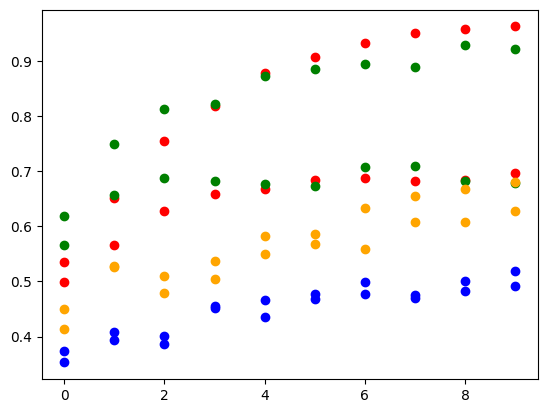

In [ ]:
colors = ["red","green","orange","blue"]

for i in range(4):
  plt.scatter([0,1,2,3,4,5,6,7,8,9],train_acc_history[i],c=colors[i])
  plt.scatter([0,1,2,3,4,5,6,7,8,9],val_acc_history[i],c=colors[i])

plt.show()

In [ ]:
p#model = EfficientNet.from_pretrained('efficientnet-b4',num_classes=3)
#model

In [ ]:
lr_params = [0.0001,0.0005,0.001,0.005,0.01]
optimize(train_dataset,lr_params,max_epochs=25)

Param value:  0.0001
Fold:  0


Resnet Self-Implementation

In [ ]:
import torch.nn as nn
import torch.nn.functional as F #this is for relu

class ConvNet(nn.Module): #inherits from nn.module

  def __init__(self):
    super().__init__() #run init method of parent class

    """
    Let's just define the functions we'll use later for forward
    """

    self.conv1 = nn.Conv2d(3, 100, 5) #3 input channels for rgb, 100 convolutional kernels, all size 5 by 5
    self.conv2 = nn.Conv2d(100, 50, 3)
    self.conv3 = nn.Conv2d(50, 20, 3)

    self.pool = nn.MaxPool2d(2,2) #largest pixel value from each 2 by 2 window
    self.fc1 = nn.Linear(13520,80)
    self.fc2 = nn.Linear(80,40)
    self.fc3 = nn.Linear(40,2) #only two outputs for the binary cat/dog label

  def forward(self,x):
    print('x_shape:',x.shape)
    x = self.pool(F.relu(self.conv1(x))) #do kernel convolution to x, then do relu, then do max pooling
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))

    print('x_shape:',x.shape)

    #DO NOT FORGET TO FLATTEN BEFORE LINEAR LAYERS

    x = torch.flatten(x,1)

    print('x_shape:',x.shape)

    x = F.relu(self.fc1(x))

    print('x_shape:',x.shape)

    x = F.relu(self.fc2(x))

    print('x_shape:',x.shape)

    x = self.fc3(x) #just return the output, no nonlinear lyaers

    print('x_shape:',x.shape)

    return x

model = ConvNet().to(device)

import torch
torch.cuda.empty_cache()

train(model, train_dataloader, optimizer, k_epochs = 100, print_every = 50)

In [ ]:
#references https://arxiv.org/pdf/1512.03385.pdf, original resnet paper
# and https://blog.paperspace.com/writing-resnet-from-scratch-in-pytorch/ for pointers on code
# https://github.com/microsoft/nni/blob/master/examples/trials/cifar10_pytorch/models/resnet.py

import torch
import torch.nn as nn

class Resnet(nn.Module):
  """
  for now I'm doing the 34 version
  """
  def __init__(self, num_classes):

    super(Resnet,self).__init__() #is (Resnet,self) necessary?

    #want to take matrix 224*224 to 112*112, padding 3 ensures that each kernel 
    # centered on pixel in matrix, stride =2 makes it every other pixel, hence dimension is half
    self.conv1 = nn.Sequential(
      nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 7, stride = 2, padding=3), 
      nn.BatchNorm2d(num_features = 64),
      nn.ReLU()
    )
    #now do 3 by 3 max pool, similarly need padding 1 to make sure kernel
    # centered on each pixel, stride=2 make it other pixel, dimension 56*56
    self.maxpool = nn.MaxPool2d(kernel_size = 3,stride=2,padding=1) #not sure why there is padding

    #each time we reduce the size of the matrix by half, hence stride of 2 (for conv2_x, maxpool reduced dimension)
    self.conv2_x = self.make_conv_layer(64,64,kernel_size = 3, stride = 1, num_layers = 3)
    self.conv3_x = self.make_conv_layer(64,128,kernel_size = 3, stride = 2, num_layers = 4)
    self.conv4_x = self.make_conv_layer(128,256,kernel_size = 3, stride = 2, num_layers = 6)
    self.conv5_x = self.make_conv_layer(256,512,kernel_size = 3, stride = 2, num_layers = 3)

    #size is now [512,7,7], want it to be [512,1,1] so kernel size 7
    #self.avgpool = nn.AvgPool2d(kernel_size = 7,stride = 1) #no idea why this is 7
    self.avgpool = nn.AdaptiveAvgPool2d((1,1)) #this is what preloaded resnet34 has

    self.fc = nn.Linear(512,num_classes)

  #this is specific to resnet 34
  def make_conv_layer(self,in_channels, out_channels, kernel_size, stride, num_layers):
    #conv 1 - 64 out, conv2 - 64 in 64 out, 64 in 64 out, 64 in 64 out, conv3 - 64 in 128 out, 128 in 128 out
    
    layer_list = []

    in_ch = in_channels
  
    # first block is input stride, reset are stride of 1

    layer_list.append(ResidualBlock(in_ch,out_channels,kernel_size,stride))
    in_ch = out_channels

    for i in range(1,num_layers):
      layer_list.append(ResidualBlock(in_ch,out_channels,kernel_size,stride=1))

    return nn.Sequential(*layer_list)

  def forward(self,x):
    x = self.conv1(x)
    x = self.maxpool(x)
    x = self.conv2_x(x)
    x = self.conv3_x(x)
    x = self.conv4_x(x)
    x = self.conv5_x(x)
    x = self.avgpool(x)
    
    #x = torch.flatten(x)
    x = x.view(x.size(0), -1) #not sure why but flatten doesn't work
    x = self.fc(x)
    return x


class ResidualBlock(nn.Module):
  def __init__(self,in_channels,out_channels,kernel_size,stride):
    """
    Some math, input kernel to conv2_x is [64,56,56], can just do stride 1, size maintained
    Input kernel to conv3_x is [64,56,56] want [128,28,28], after convolutions x is [128,28,28] (stride 2 at first then stride 1),
    But x is still [64,56,56], so no padding, use kernel size 1 with 128 outchannels and stride 2
    """

    super(ResidualBlock,self).__init__()
    #again note padding here is 1 because kernel is 3 by 3
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels = in_channels, out_channels = out_channels, kernel_size = 3, stride = stride, padding = 1),
        nn.BatchNorm2d(num_features = out_channels),
        nn.ReLU()
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(in_channels = out_channels, out_channels = out_channels, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(num_features = out_channels) #don't do ReLU here since we might downsample
    )

    self.skip_connection = nn.Sequential() #identity

    #idea here is that skip_connection will add the input x to itself
    # but if stride != 1 or in_channels != out_channels, we need to change dimensions of x
    # so that the dimensions of x after conv1 and conv2 applied
    if stride != 1 or in_channels != out_channels:
      self.skip_connection = nn.Sequential(
          nn.Conv2d(in_channels,out_channels,kernel_size=1,stride=stride),
          nn.BatchNorm2d(num_features = out_channels)
      )
    self.ReLU = nn.ReLU()

  def forward(self,x):
    x_layer = self.conv1(x)
    x_layer = self.conv2(x_layer)
    x_layer += self.skip_connection(x)
    x_layer = self.ReLU(x_layer)
    return x_layer

    


In [ ]:
from torchsummary import summary
model = Resnet(4)
model
model.to(device)
summary(model,(3,224,224))